In [24]:
import keras
from keras import layers


encoding_dim = 32
#input_img = keras.Input(shape=(28,28,1))
input_img = keras.Input(shape=(128,128,3))


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [25]:
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 64, 64, 8)         1160      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 32, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 32, 32, 8)         584

In [7]:
# DATASET = mnist
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
import numpy as np
import os
from PIL import Image

X_train = []
dataset_path = "/Users/somrawee/Coding/DataSet/CastingProduct/casting_512x512/casting_512x512/ok_front"

image_names = os.listdir(dataset_path)

for i in image_names:
    img = Image.open(dataset_path + '/' + i)
    img = img.resize((128, 128))
    img = np.asarray(img)
    X_train.append(img)

X_train = np.asarray(X_train)
X_train = (X_train.astype(np.float32)-127.5) /127.5

print(X_train.shape)






(519, 128, 128, 3)


In [5]:
dataset = X_train

from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(dataset, test_size=0.2)

print(x_train.shape)
print(x_test.shape)



(415, 128, 128, 3)
(104, 128, 128, 3)


In [26]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/Users/somrawee/Coding/logs')])

Epoch 1/50


2023-12-21 13:08:16.335364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<128x128x128x3xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<128x128x128x

3/4 [=====================>........] - ETA: 0s - loss: 0.6928

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<31x128x128x3xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<31x128x128x3xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerfo

4/4 [==============================] - ETA: 0s - loss: 0.6926

2023-12-21 13:08:18.451458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 462ms/step - loss: 0.6926 - val_loss: 0.6901
Epoch 2/50


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<104x128x128x3xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<104x128x128x3xi1>'


4/4 [==============================] - 1s 186ms/step - loss: 0.6889 - val_loss: 0.6848
Epoch 3/50
4/4 [==============================] - 1s 178ms/step - loss: 0.6820 - val_loss: 0.6710
Epoch 4/50
4/4 [==============================] - 1s 177ms/step - loss: 0.6616 - val_loss: 0.6192
Epoch 5/50
4/4 [==============================] - 1s 166ms/step - loss: 0.5822 - val_loss: 0.4385
Epoch 6/50
4/4 [==============================] - 1s 165ms/step - loss: 0.3557 - val_loss: 0.1952
Epoch 7/50
4/4 [==============================] - 1s 165ms/step - loss: 0.1914 - val_loss: 0.0882
Epoch 8/50
4/4 [==============================] - 1s 165ms/step - loss: 0.0267 - val_loss: -0.2577
Epoch 9/50
4/4 [==============================] - 1s 165ms/step - loss: -0.4461 - val_loss: -1.4520
Epoch 10/50
4/4 [==============================] - 1s 164ms/step - loss: -2.3257 - val_loss: -5.9302
Epoch 11/50
4/4 [==============================] - 1s 165ms/step - loss: -8.8226 - val_loss: -22.8591
Epoch 12/50
4/4 [====

plot latent space of test_dataset

16/17 [===========================>..] - ETA: 0s

2023-12-21 13:49:37.320485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 12ms/step
(519, 4, 4, 8)


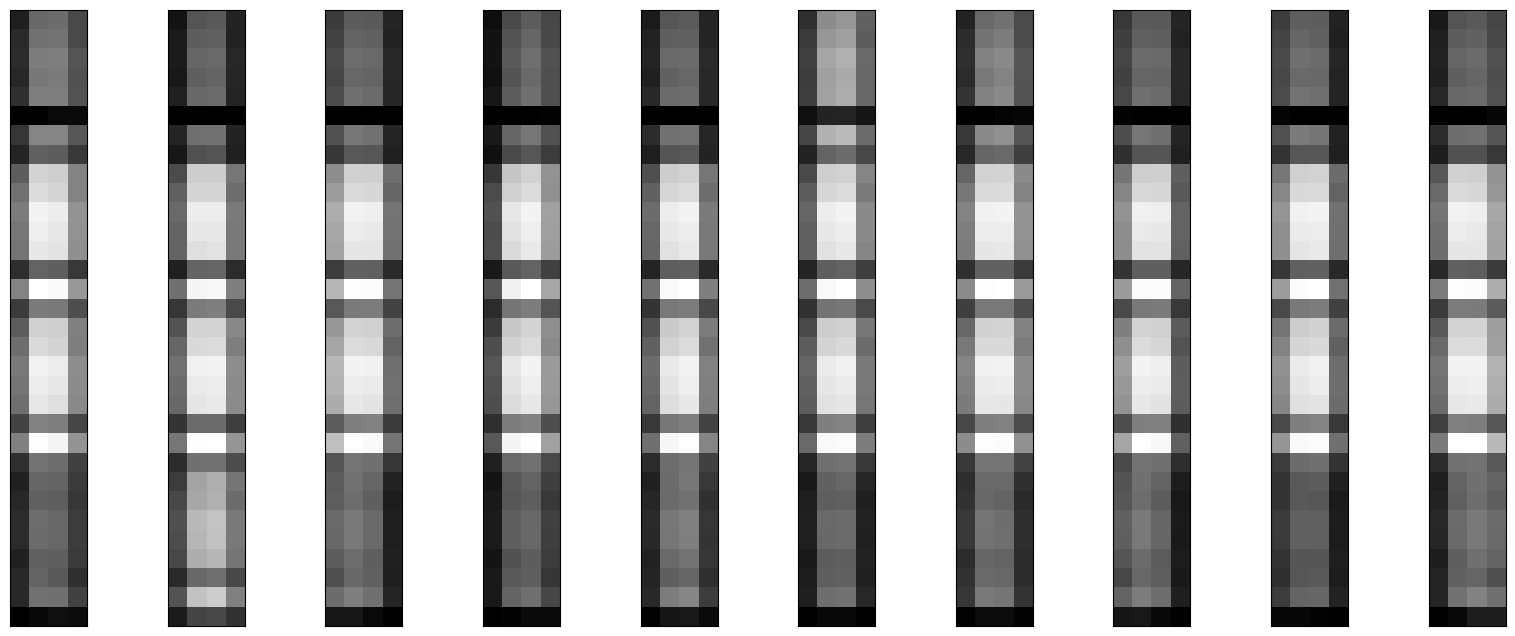

In [34]:
import matplotlib.pyplot as plt

encoder = keras.Model(input_img, encoded)
#encoded_imgs = encoder.predict(x_test)
encoded_imgs = encoder.predict(dataset)

print(encoded_imgs.shape)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    
    ax.get_yaxis().set_visible(False)
plt.show()

In [35]:
print(encoded_imgs.shape)

reshaped_encoded_imgs = np.reshape(encoded_imgs, (encoded_imgs.shape[0], 128))

print(reshaped_encoded_imgs.shape)

(519, 4, 4, 8)
(519, 128)


In [33]:
print(encoded_imgs)

[[[[1.67746125e+05 2.31167672e+05 2.33645203e+05 ... 2.79550079e+02
    3.08149125e+05 2.07939750e+05]
   [8.17553875e+05 1.07866238e+06 1.17442512e+06 ... 2.79511000e+05
    1.28414762e+06 6.87996875e+05]
   [1.03456831e+06 1.32581988e+06 1.45285050e+06 ... 8.02424688e+05
    1.53193825e+06 6.45759438e+05]
   [5.41940250e+05 6.49640312e+05 7.25634375e+05 ... 6.43181938e+05
    6.74672188e+05 2.22946699e+04]]

  [[9.70955625e+05 1.12511250e+06 1.20805712e+06 ... 0.00000000e+00
    1.37717212e+06 1.01295362e+06]
   [3.26270025e+06 3.52017875e+06 3.91690500e+06 ... 1.30556362e+06
    4.09379425e+06 2.16829425e+06]
   [3.75631150e+06 3.94970950e+06 4.37816400e+06 ... 2.31794650e+06
    4.61454600e+06 2.04080800e+06]
   [1.87367850e+06 1.84459288e+06 2.05188338e+06 ... 1.88290800e+06
    2.11304100e+06 1.95246531e+05]]

  [[1.26310850e+06 1.38904662e+06 1.51887588e+06 ... 0.00000000e+00
    1.64690438e+06 1.26322062e+06]
   [3.80774000e+06 4.02551500e+06 4.48677050e+06 ... 1.57819512e+06
 

In [36]:
print(np.min(encoded_imgs[0]))
print(np.max(encoded_imgs[0]))


0.0
5434446.5


In [39]:
mean_value = np.mean(encoded_imgs)
std_dev = np.std(encoded_imgs)

# Z-score normalization
normalized_array = (encoded_imgs - mean_value) / std_dev

print(normalized_array.shape)
print(np.min(normalized_array))
print(np.max(normalized_array))

(519, 4, 4, 8)
-1.6553032
2.5052166
